In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import seaborn as sns
from sklearn import tree
import graphviz

from  sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

sns.set(style='whitegrid'); sns.set_context('talk')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# library for preprocessing, model, pipeline and Decision Tree
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn import metrics

In [2]:
path = '/Users/yesteven/hello/碩二上/大數據分析/Project/adult.data.csv'
data = pd.read_csv(path)
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
#Finding if special characters are present in the data
data.isin([' ?']).sum(axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [4]:
print('整理前資料筆數：', len(data))

# Remove invalid data from table
data = data[(data.astype(str) != ' ?').all(axis=1)]
print('整理後資料筆數：', len(data))

整理前資料筆數： 32561
整理後資料筆數： 30162


In [5]:
X = data.drop(['income'], axis = 1)
X = pd.get_dummies(X)

In [6]:
Y=pd.Categorical(data['income']).codes

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [10]:
print('訓練集資料筆數：',x_train.shape[0])
print('測試集資料筆數：',x_test.shape[0])

訓練集資料筆數： 21113
測試集資料筆數： 9049


# Decision Tree -- Gini

In [11]:
model = DecisionTreeClassifier(random_state = 13)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=13)

y_pred_gini = model.predict(x_test)
print("Accuracy of Decision Trees : " , metrics.accuracy_score(y_test, y_pred_gini))

scores = cross_val_score(model, X, Y, cv=10)
print('cv-10 average score is : {:.2f} %'.format(scores.mean()*100))

In [13]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# making predictions
#y_pred_gini = clf_gini.predict(X_test)

# Printing classifier report after prediction
print(classification_report(y_test,y_pred_gini))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      6813
           1       0.62      0.62      0.62      2236

    accuracy                           0.81      9049
   macro avg       0.75      0.75      0.75      9049
weighted avg       0.81      0.81      0.81      9049



In [20]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO 
from sklearn.tree import export_graphviz
import pydotplus,graphviz

# plotting tree with max_depth=3
#dot_data = StringIO()  
tree = export_graphviz(model, out_file=None,
                max_depth=3,
                feature_names=X.columns,
                class_names=['<=50K', '>50K'], 
                filled=True,rounded=True)

graph = graphviz.Source(tree, format = 'png')  
graph.render('aBC')
#Image(graph.create_png())

'aBC.png'

## Check the max depth -- gini

In [27]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 10

# parameters to build the model on
parameters = {'max_depth': range(1, 15)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 13)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=13),
             param_grid={'max_depth': range(1, 15)}, scoring='accuracy')

In [28]:
# scores of GridSearch CV
scores = tree.cv_results_
df = pd.DataFrame(scores)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020409,0.007922,0.001361,0.000439,1,{'max_depth': 1},0.750473,0.750000,0.750000,0.750355,0.750355,0.750355,0.750355,0.750355,0.750355,0.750355,0.750296,0.000152,14
1,0.023621,0.000058,0.001167,0.000012,2,{'max_depth': 2},0.827652,0.825284,0.820076,0.815253,0.824254,0.826149,0.827570,0.827570,0.822359,0.825675,0.824184,0.003771,13
2,0.030874,0.000118,0.001185,0.000028,3,{'max_depth': 3},0.847538,0.840436,0.837121,0.833254,0.838465,0.842255,0.844623,0.843202,0.840360,0.838465,0.840572,0.003861,11
3,0.038563,0.001486,0.001241,0.000084,4,{'max_depth': 4},0.848485,0.839962,0.835701,0.832307,0.837991,0.846045,0.847466,0.842255,0.838939,0.838465,0.840762,0.004987,10
4,0.044720,0.000126,0.001240,0.000013,5,{'max_depth': 5},0.853693,0.842330,0.842330,0.833728,0.841307,0.855992,0.851255,0.842255,0.839886,0.841781,0.844456,0.006569,7
5,0.051224,0.000206,0.001250,0.000010,6,{'max_depth': 6},0.852746,0.851799,0.845170,0.843202,0.851255,0.855045,0.853150,0.850782,0.843676,0.851255,0.849808,0.003988,3
6,0.057452,0.000270,0.001261,0.000010,7,{'max_depth': 7},0.852273,0.851326,0.844697,0.845097,0.848413,0.857414,0.853624,0.853624,0.847466,0.852676,0.850661,0.003899,1
7,0.063398,0.000307,0.001272,0.000015,8,{'max_depth': 8},0.850379,0.853693,0.844697,0.847466,0.849834,0.857414,0.852203,0.850308,0.847939,0.851729,0.850566,0.003351,2
8,0.069316,0.000215,0.001284,0.000015,9,{'max_depth': 9},0.846117,0.849432,0.839962,0.841781,0.845571,0.856466,0.849360,0.847466,0.837044,0.843676,0.845688,0.005233,5
9,0.074642,0.000434,0.001297,0.000009,10,{'max_depth': 10},0.851326,0.846591,0.845170,0.839886,0.837991,0.854098,0.847466,0.849834,0.843676,0.846045,0.846208,0.004672,4


In [29]:
data = df[['param_max_depth', 'rank_test_score','mean_test_score']]
data

,param_max_depth,rank_test_score,mean_test_score
0,1,14,0.750296
1,2,13,0.824184
2,3,11,0.840572
3,4,10,0.840762
4,5,7,0.844456
5,6,3,0.849808
6,7,1,0.850661
7,8,2,0.850566
8,9,5,0.845688
9,10,4,0.846208


<function matplotlib.pyplot.show(close=None, block=None)>

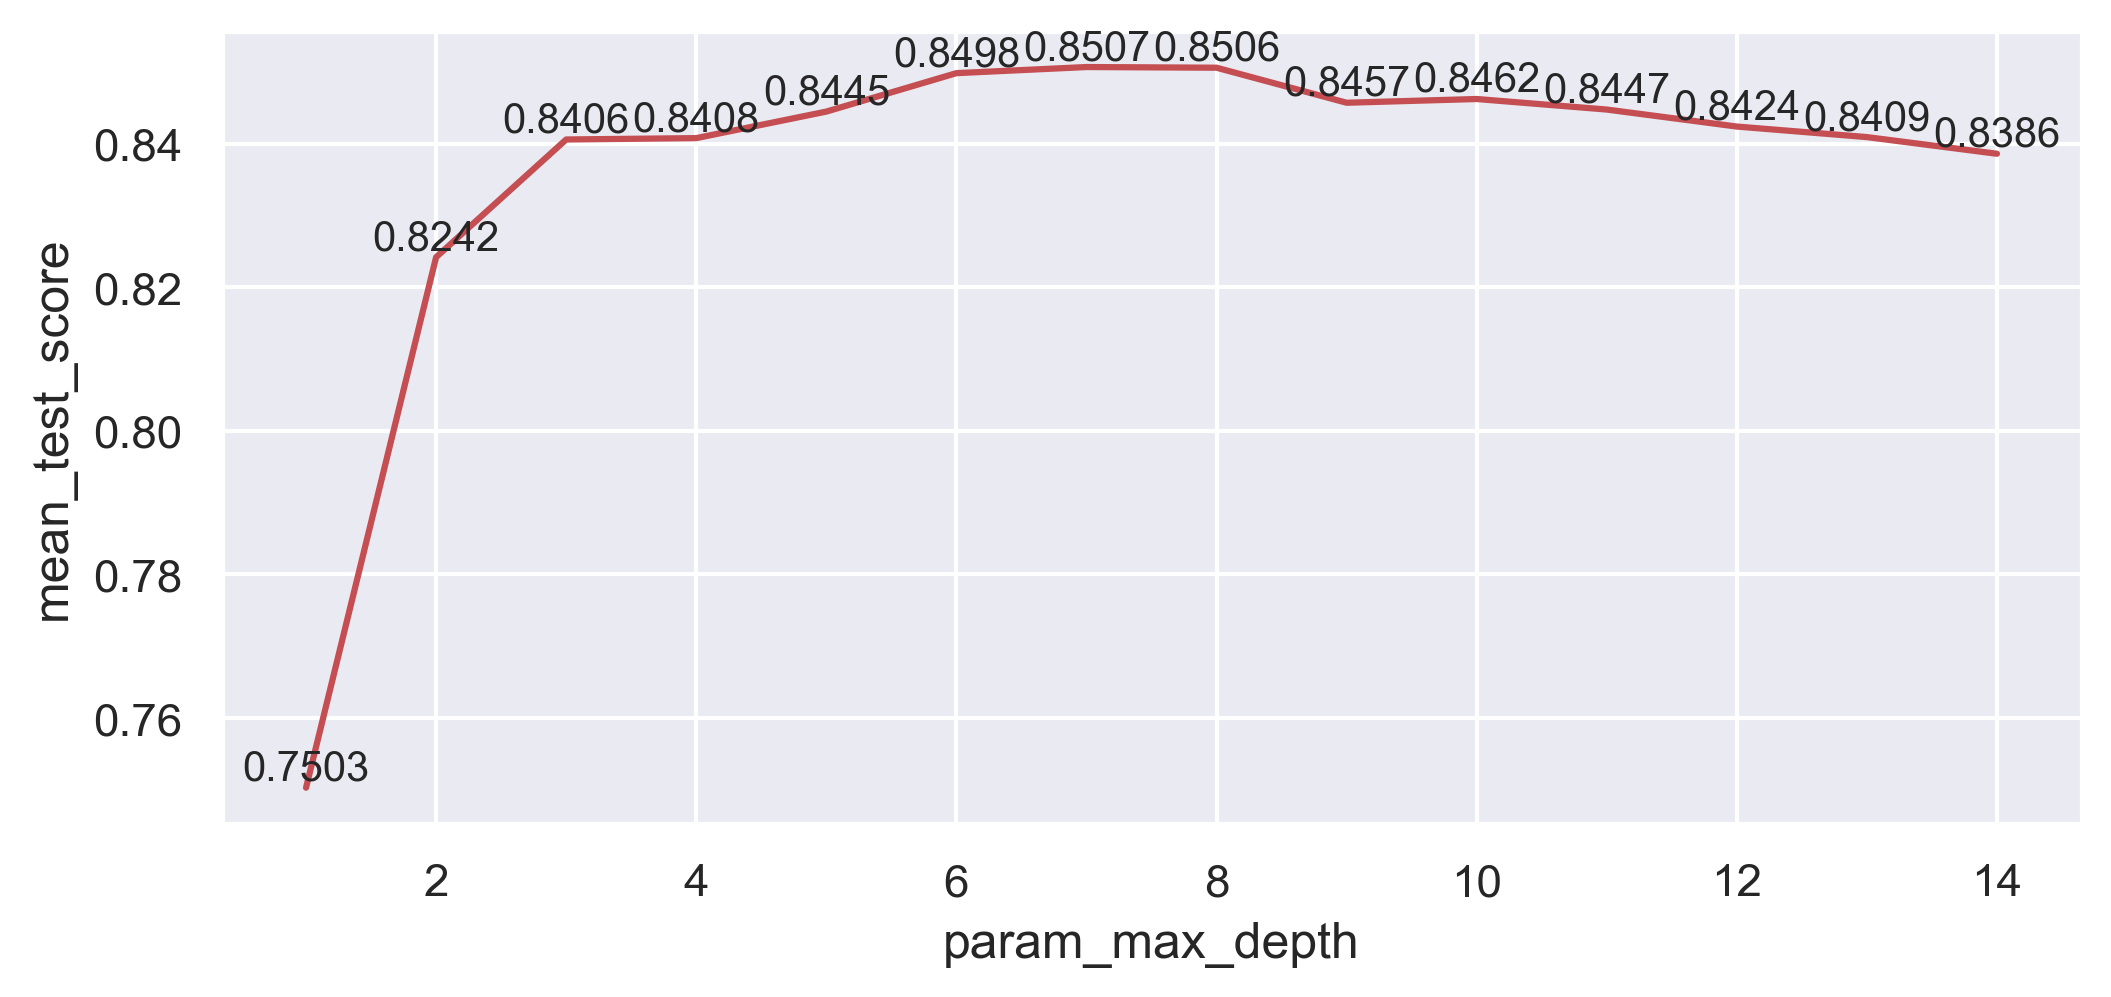

In [30]:
plt.figure(figsize=(8,3.5), dpi=150)

for a, b in zip(df['param_max_depth'], df['mean_test_score']):
    plt.text(a, b, '%.4f'%b, ha = 'center', va = 'bottom', fontsize = 10)
    
plt.plot(df['param_max_depth'], df['mean_test_score'], 'r')

plt.xlabel("param_max_depth")
plt.ylabel("mean_test_score")
    
plt.show

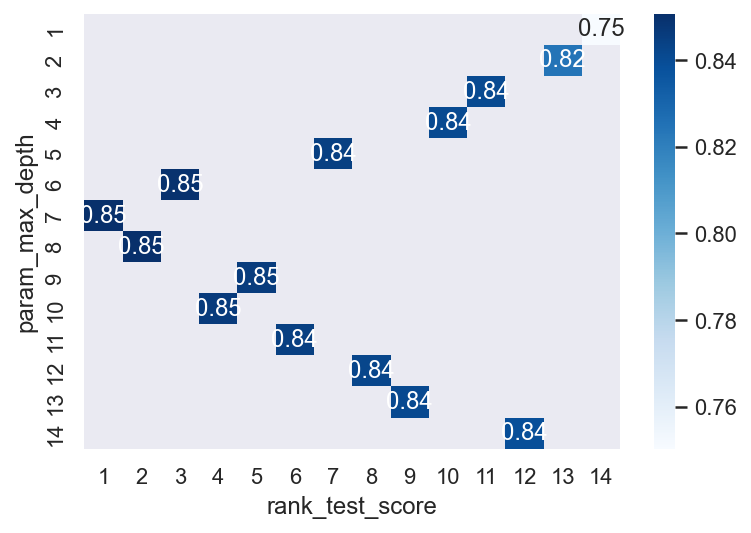

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Load the example flights dataset and convert to long-form
#flights_long = sns.load_dataset("flights")
data = data.pivot('param_max_depth', 'rank_test_score','mean_test_score')

# Draw a heatmap with the numeric values in each cell
#f, ax = plt.subplots(figsize=(9, 6))
#sns.heatmap(data, annot=True, fmt="d", linewidths=.5, ax=ax)

ax = sns.heatmap(data, annot=True, fmt='.2f',cmap = "Blues")

# Decision Tree -- entropy

In [32]:
model_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state = 13)
model_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=13)

In [33]:
y_pred_entropy = model_entropy.predict(x_test)
print("Accuracy of Decision Trees : " , metrics.accuracy_score(y_test, y_pred_entropy))

scores = cross_val_score(model_entropy, X, Y, cv=10)
print('cv-10 average score is : {:.2f} %'.format(scores.mean()*100))

Accuracy of Decision Trees :  0.8100342579290529
cv-10 average score is : 81.24 %


In [34]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# making predictions
#y_pred_gini = clf_gini.predict(X_test)

# Printing classifier report after prediction
print(classification_report(y_test,y_pred_entropy))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      6813
           1       0.61      0.63      0.62      2236

    accuracy                           0.81      9049
   macro avg       0.74      0.75      0.75      9049
weighted avg       0.81      0.81      0.81      9049



In [35]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO 
from sklearn.tree import export_graphviz
import pydotplus,graphviz

# plotting tree with max_depth=3
#dot_data = StringIO()  
tree = export_graphviz(model_entropy, out_file=None,
                max_depth=3,
                feature_names=X.columns,
                class_names=['<=50K', '>50K'], 
                filled=True,rounded=True)

graph = graphviz.Source(tree, format = 'png')  
graph.render('decTree_TRYtryentropy_cross')

'decTree_TRYtryentropy_cross.png'

## check the max depth

In [36]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 10

# parameters to build the model on
parameters = {'max_depth': range(1, 15)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "entropy", 
                               random_state = 13)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=13),
             param_grid={'max_depth': range(1, 15)}, scoring='accuracy')

In [37]:
# scores of GridSearch CV
scores = tree.cv_results_
df = pd.DataFrame(scores)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020807,0.007910,0.001333,0.000271,1,{'max_depth': 1},0.750473,0.750000,0.750000,0.750355,0.750355,0.750355,0.750355,0.750355,0.750355,0.750355,0.750296,0.000152,14
1,0.024125,0.000100,0.001174,0.000008,2,{'max_depth': 2},0.827652,0.825284,0.820076,0.815253,0.824254,0.826149,0.827570,0.827570,0.822359,0.825675,0.824184,0.003771,13
2,0.032374,0.001118,0.001216,0.000053,3,{'max_depth': 3},0.847538,0.840436,0.837121,0.833254,0.838465,0.842255,0.844623,0.843202,0.840360,0.838465,0.840572,0.003861,11
3,0.038816,0.000173,0.001199,0.000008,4,{'max_depth': 4},0.848011,0.840436,0.837121,0.832781,0.837991,0.843202,0.844623,0.843676,0.838465,0.839413,0.840572,0.004164,12
4,0.045676,0.000157,0.001205,0.000006,5,{'max_depth': 5},0.850379,0.841856,0.841383,0.834202,0.841307,0.848887,0.843676,0.842729,0.839413,0.839886,0.842372,0.004387,9
5,0.052144,0.000262,0.001215,0.000016,6,{'max_depth': 6},0.853220,0.849905,0.843750,0.845097,0.847939,0.856466,0.849360,0.850782,0.846518,0.848887,0.849192,0.003569,3
6,0.058332,0.000445,0.001228,0.000012,7,{'max_depth': 7},0.852273,0.851799,0.846117,0.844150,0.846518,0.854098,0.850308,0.854098,0.843676,0.852676,0.849571,0.003858,2
7,0.064113,0.000657,0.001244,0.000011,8,{'max_depth': 8},0.854167,0.853693,0.845644,0.846992,0.849360,0.855519,0.846992,0.855519,0.847939,0.854098,0.850992,0.003749,1
8,0.069320,0.000768,0.001250,0.000012,9,{'max_depth': 9},0.852273,0.851799,0.845644,0.841781,0.851255,0.854571,0.849834,0.854098,0.838939,0.846992,0.848719,0.004992,4
9,0.074003,0.001164,0.001268,0.000016,10,{'max_depth': 10},0.850379,0.850379,0.856534,0.838939,0.846045,0.854571,0.850782,0.840834,0.841781,0.846045,0.847629,0.005599,5


In [38]:
data = df[['param_max_depth', 'rank_test_score','mean_test_score']]
data

,param_max_depth,rank_test_score,mean_test_score
0,1,14,0.750296
1,2,13,0.824184
2,3,11,0.840572
3,4,12,0.840572
4,5,9,0.842372
5,6,3,0.849192
6,7,2,0.849571
7,8,1,0.850992
8,9,4,0.848719
9,10,5,0.847629


<function matplotlib.pyplot.show(close=None, block=None)>

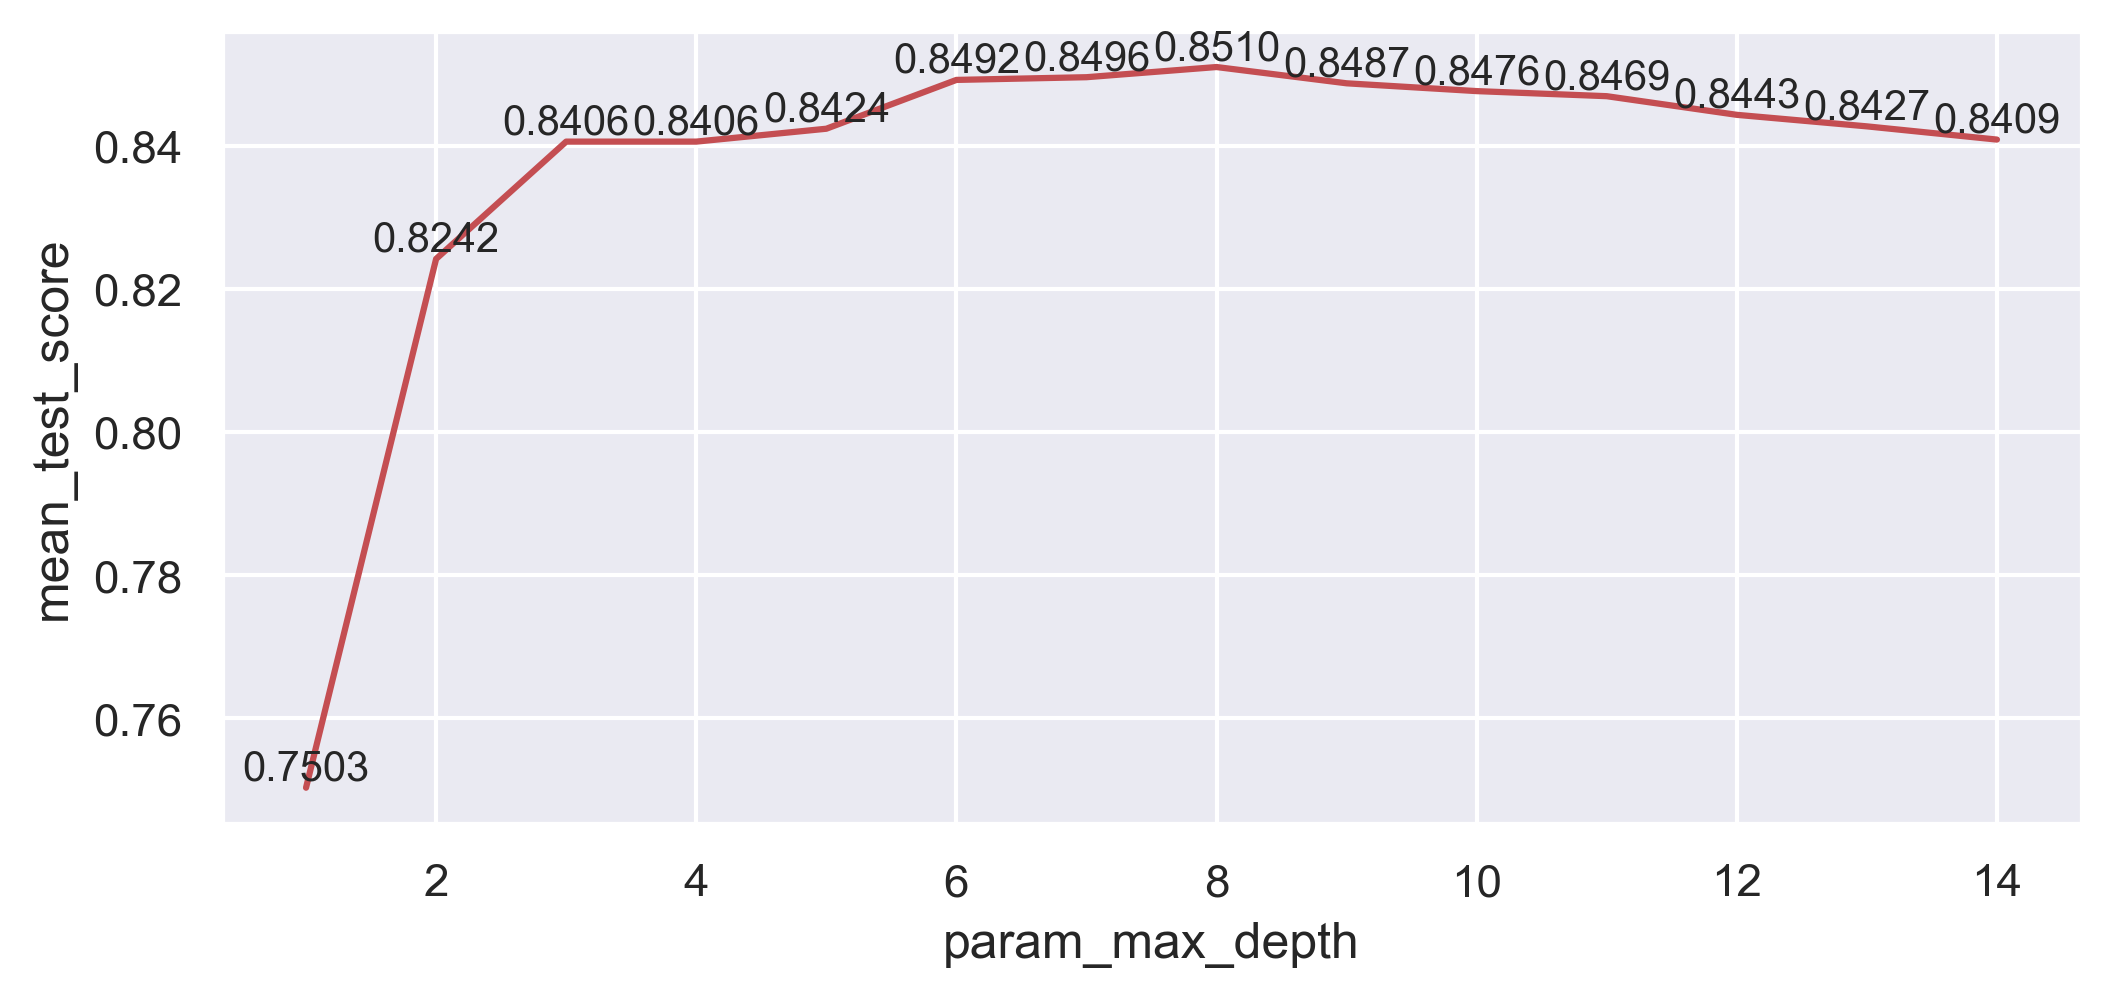

In [40]:
plt.figure(figsize=(8,3.5), dpi=150)

for a, b in zip(data['param_max_depth'], data['mean_test_score']):
    plt.text(a, b, '%.4f'%b, ha = 'center', va = 'bottom', fontsize = 10)
    
plt.plot(data['param_max_depth'], data['mean_test_score'], 'r')

plt.xlabel("param_max_depth")
plt.ylabel("mean_test_score")
    
plt.show

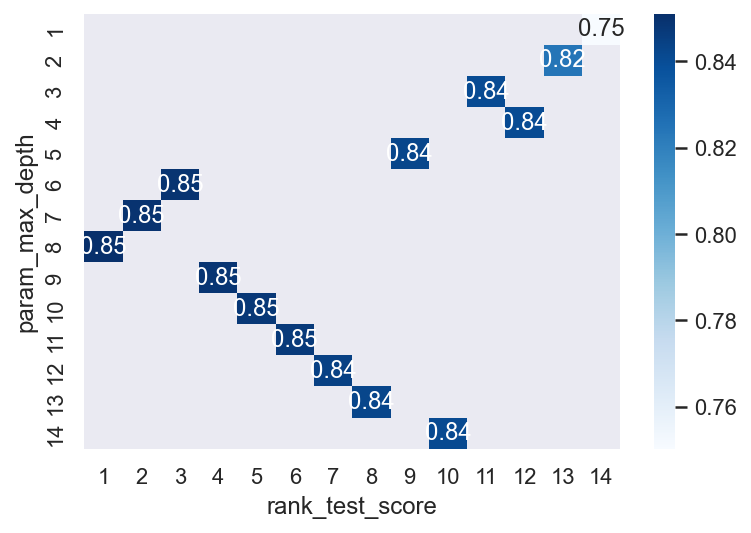

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Load the example flights dataset and convert to long-form
#flights_long = sns.load_dataset("flights")
data = data.pivot('param_max_depth', 'rank_test_score','mean_test_score')

# Draw a heatmap with the numeric values in each cell
#f, ax = plt.subplots(figsize=(9, 6))
#sns.heatmap(data, annot=True, fmt="d", linewidths=.5, ax=ax)

ax = sns.heatmap(data, annot=True, fmt='.2f',cmap = "Blues")